<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# What the dataset looks like?
print(websites.shape, websites.columns)
websites.head(8)

(1781, 21) Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
# Which columns contain the features of the websites?
features = websites[['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES']]
features.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0


In [37]:
# Which column contains the feature we will predict? What is the code standing 
# for benign vs malicious websites?

target = websites[['Type']]
target[0:5]

,Type
3,0
6,0
7,0
11,0
16,1


In [ ]:
# 0 for bening 1 for maliciuos websites

In [7]:
# Do we need to transform any of the columns from categorical to ordinal values? 
# If so what are these columns?

features.head()
#categorical columns are : 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO'.questioning the relevance of not droping them since some of them seem to have a lot of unique values.

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                         0.162104           

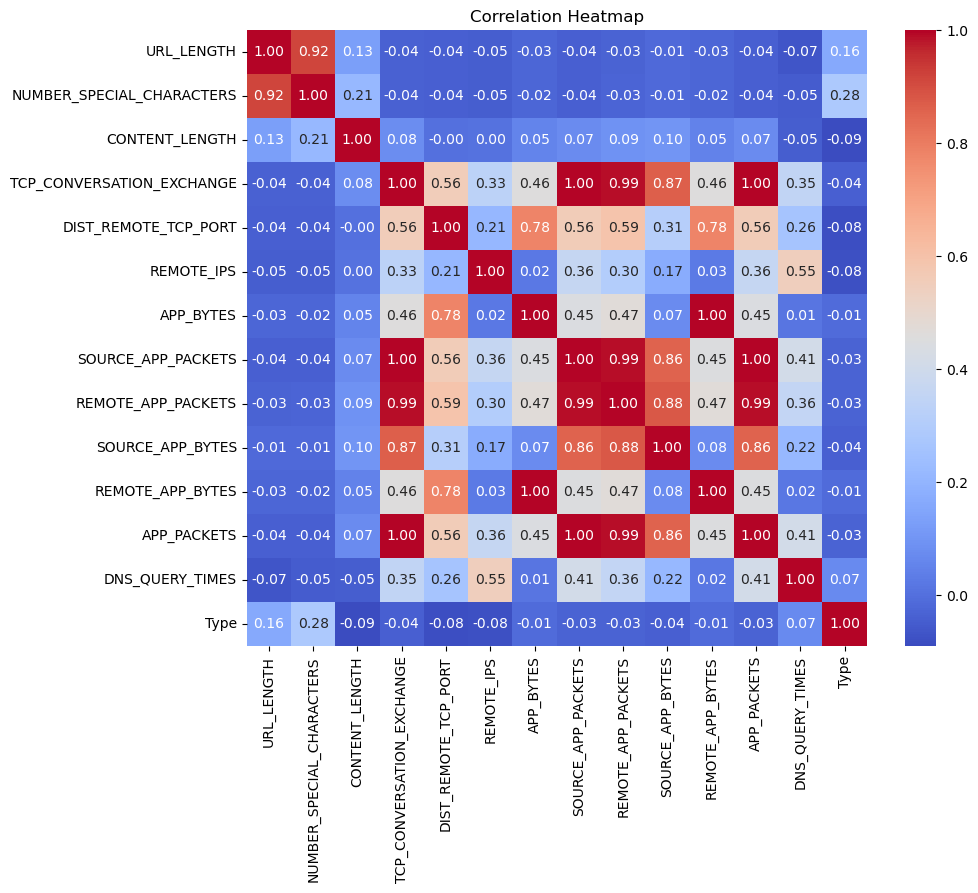

In [8]:
# Your code here
correlation_matrix = websites.select_dtypes(include='number').corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
'''columsn to drop due to high collinearity : APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_PACKETS,
 TP_CONVERSATION_EXCHANGE, but ill try removing them one by one and take a look at the new heatmap'''

### This is an example to know the feacture importance using a ML model

In [28]:
! pip install xgboost
import xgboost

In [22]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [30]:
xgb.fit(X,y)

AttributeError: module 'xgboost' has no attribute 'fit'

In [31]:
sort_idx = xgb.feature_importances_.argsort()

AttributeError: module 'xgboost' has no attribute 'feature_importances_'

In [32]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

NameError: name 'plt' is not defined

    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

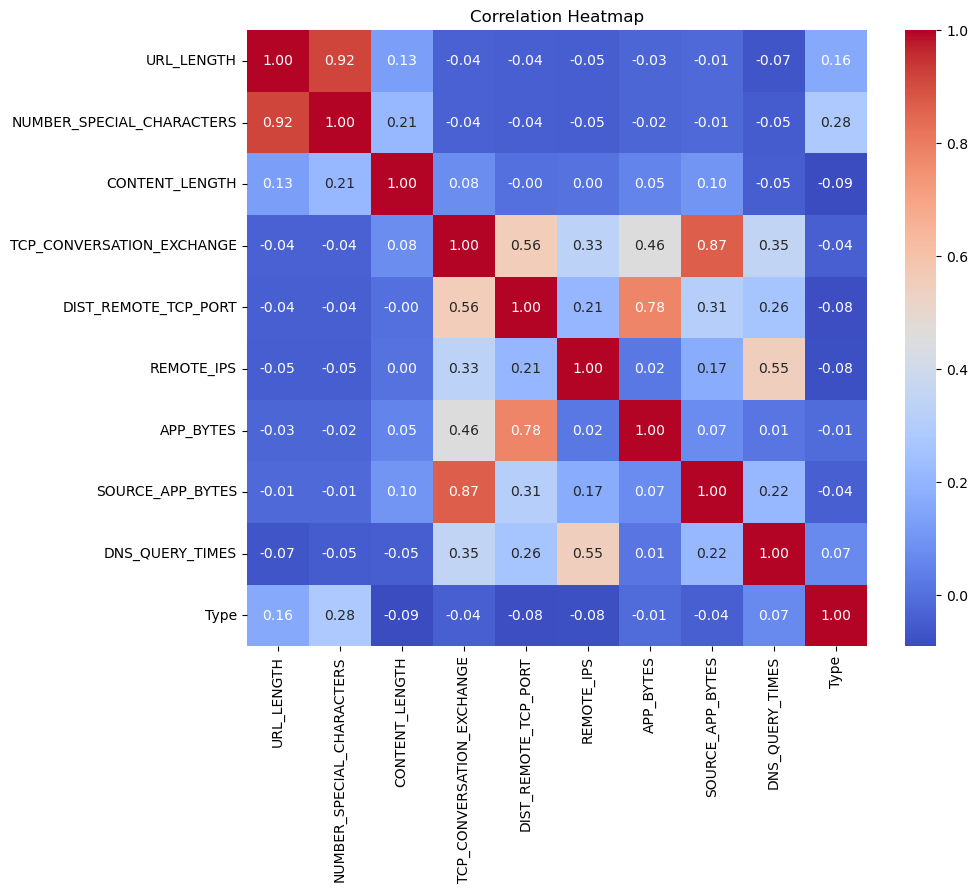

In [9]:
# Your code here

websites_drop = websites.drop(['APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES'], axis=1, inplace=False)
#i added the columns names gradually, to check the heatmap at every drop

correlation_matrix = websites_drop.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY
websites = websites_drop
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,1153,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,1265,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,18784,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,129889,4.0,0


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [11]:
# Your code here
nan_count = websites.isna().sum()
print(nan_count)


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [12]:
# Firts we will drop the columns with more than 50% of missing data
websites_drop_nan = websites.dropna(thresh=len(websites) / 2, axis=1)
websites_drop_nan.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,1153,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,1265,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,18784,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,129889,4.0,0


In [13]:
# Now we will drop the rows with missing data
websites_drop_nan = websites_drop_nan.dropna()

#checking everything is ok then assigning it back to 'websites'
nan_count = websites_drop_nan.isna().sum()
print(nan_count)

websites = websites_drop_nan


URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [14]:
# Examine missing values in each column
nan_count = websites.isna().sum()
print(nan_count)

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [15]:
websites.WHOIS_COUNTRY.value_counts()
#websites.head()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [16]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x : good_country[x])

In [17]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [18]:
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

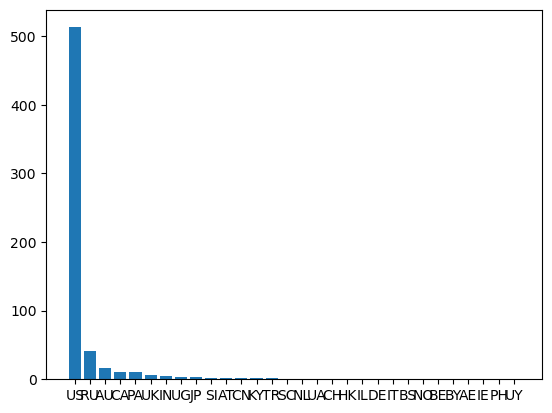

<Figure size 1500x1500 with 0 Axes>

In [19]:
print_bar_plot(websites.WHOIS_COUNTRY.unique(),websites.WHOIS_COUNTRY.value_counts());

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [20]:
# Your code here
# Step 1: Verify the column values
top_values = websites.WHOIS_COUNTRY.value_counts().head(9).index
print("Top 10 Values:", top_values)

# Step 2: Relabel other values as 'OTHER'
websites['WHOIS_COUNTRY'] = websites.WHOIS_COUNTRY.apply(lambda x: x if x in top_values else 'OTHER')

# Verify the result
print(websites.WHOIS_COUNTRY.value_counts())

Top 10 Values: Index(['US', 'CA', 'UK', 'AU', 'PA', 'JP', 'CH', 'IN', 'AT'], dtype='object', name='WHOIS_COUNTRY')
WHOIS_COUNTRY
US       513
CA        41
OTHER     26
UK        16
AU        11
PA        10
JP         6
CH         5
IN         4
AT         4
Name: count, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [22]:
# Your code here
websites_drop_columns = websites.drop(['WHOIS_STATEPRO','WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=False)
websites = websites_drop_columns
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,18784,8.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,12,0,3,1189,8559,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0.0,0
11,B0_1102,20,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,0,0,0,0,0,0.0,0
16,M0_97,21,7,iso-8859-1,nginx,686.0,OTHER,6,0,2,603,1580,2.0,1


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [23]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [28]:
# Your code here
websites_dropurl = websites.drop('URL', axis=1, inplace=False)
websites = websites_dropurl
websites.head()

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [29]:
# Your code here
websites.CHARSET.unique()


array(['ISO-8859-1', 'iso-8859-1', 'us-ascii', 'utf-8', 'UTF-8',
       'windows-1251'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [30]:
# Your code here
websites.SERVER.unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0',
       'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.25 (Amazon) PHP/7.0.14',
       'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Apache/2.2.15 (CentOS)',
       'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40',
       'Apache/2.2.3 (CentOS)', 'Apache/2.4', 'Apache/2.4.10 (Debian)',
       'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [31]:
server_types = ['Microsoft', 'Apache', 'nginx']

websites.SERVER = websites.SERVER.apply(
    lambda x: next((server for server in server_types if server in x), 'Other')
)

websites.SERVER.unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [42]:
features = websites.drop(['Type'], axis=1, inplace=False)
features.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES
3,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,18784,8.0
6,18,6,iso-8859-1,Apache,345.0,US,12,0,3,1189,8559,2.0
7,19,6,us-ascii,Microsoft,324.0,US,0,0,0,0,0,0.0
11,20,6,us-ascii,Microsoft,324.0,US,0,0,0,0,0,0.0
16,21,7,iso-8859-1,nginx,686.0,OTHER,6,0,2,603,1580,2.0


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [43]:
# Your code here
website_dummies = pd.get_dummies(features, drop_first=True)
website_dummies.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,CHARSET_UTF-8,...,SERVER_nginx,WHOIS_COUNTRY_AU,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CH,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,6,162.0,31,22,3,3812,18784,8.0,False,...,True,False,False,False,False,False,False,False,False,True
6,18,6,345.0,12,0,3,1189,8559,2.0,False,...,False,False,False,False,False,False,False,False,False,True
7,19,6,324.0,0,0,0,0,0,0.0,False,...,False,False,False,False,False,False,False,False,False,True
11,20,6,324.0,0,0,0,0,0,0.0,False,...,False,False,False,False,False,False,False,False,False,True
16,21,7,686.0,6,0,2,603,1580,2.0,False,...,True,False,False,False,False,False,True,False,False,False


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [44]:
# Your code here
website_dummies.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CH                bool
WHOIS_COUNTRY_IN                bool
WHOIS_COUNTRY_JP                bool
WHOIS_COUNTRY_OTHER             bool
WHOIS_COUNTRY_PA                bool
WHOIS_COUNTRY_UK                bool
WHOIS_COUNTRY_US                bool
dtype: object

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [49]:
from sklearn.model_selection import train_test_split


X_trainset, X_testset, y_trainset, y_testset = train_test_split(website_dummies, target, test_size=0.2, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)


# Your code here:

Train set: (508, 26) (508, 1)
Test set: (128, 26) (128, 1)
      URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
1537          85                         13          8364.0   
851           48                          9         46579.0   
1090          56                          9          1264.0   
674           44                          8            11.0   
1359          69                         14         33493.0   
...          ...                        ...             ...   
1376          70                         13           324.0   
1201          60                         11         40582.0   
358           37                          7          7891.0   
744           46                          9          2393.0   
722           45                          9         23771.0   

      TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
1537                         37                     0           8       3630   
851                     

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [56]:
# Your code here:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR


LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [57]:
# Your code here:
LR.fit(X_trainset,y_trainset)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [58]:
# Your code here:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = LR.predict(X_testset)

print(confusion_matrix(y_testset, y_pred, labels = [1,0]))
print(accuracy_score(y_testset, y_pred))



[[  5   4]
 [  4 115]]
0.9375


What are your thoughts on the performance of the model? Write your conclusions below.

### Your conclusions here:
    The model is working fine but it have many errors in Type 2, it says that the model predict a non malicious web like a malicious web


#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [60]:
# Your code here:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
DTree.fit(X_trainset,y_trainset)

y_pred_tree = DTree.predict(X_testset)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [65]:
# Your code here:
print(confusion_matrix(y_testset, y_pred_tree, labels = [1,0]))
print(accuracy_score(y_testset, y_pred_tree))

prob = DTree.predict_proba(X_testset)
print(prob)


[[  1   8]
 [  0 119]]
0.9375
[[0.6        0.4       ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98148148 0.01851852]
 [1.         0.        ]
 [1.         0.        ]
 [0.6        0.4       ]
 [1.         0.        ]
 [1.         0.        ]
 [0.6        0.4       ]
 [0.98148148 0.01851852]
 [0.6        0.4       ]
 [0.98148148 0.01851852]
 [0.98148148 0.01851852]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98148148 0.01851852]
 [0.98148148 0.01851852]
 [1.         0.        ]
 [0.98148148 0.01851852]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98148148 0.01851852]
 [0.6        0.4       ]
 [1.         0.        ]
 [1.         0.     

#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [64]:
# Your code here:
DTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
DTree2.fit(X_trainset,y_trainset)

y_pred_tree2 = DTree2.predict(X_testset)

print(confusion_matrix(y_testset, y_pred_tree2, labels = [1,0]))
print(accuracy_score(y_testset, y_pred_tree2))

prob2 = DTree2.predict_proba(X_testset)
print(prob2)

[[  8   1]
 [  6 113]]
0.9453125
[[0.84090909 0.15909091]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.41666667 0.58333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.41666667 0.58333333]
 [1.         0.        ]
 [0.07692308 0.92307692]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.84090909 0.15909091]
 [1.         0.        ]
 [1.         0.  

Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

### Your conclusions here:


<!-- Add your conclusion here -->

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here

## Comments:

Add your comments here: